# **Import Library**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 24.3 MB/s eta 0:00:00


In [ ]:
# data wrangling
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# train test split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# feature engineering
from sklearn.preprocessing import StandardScaler

# === Model ===

# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.covariance import LedoitWolf
# ANN
from tensorflow import keras
from keras import optimizers

# evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# hyperparameter tuning
import keras_tuner as kt

Using TensorFlow backend


# **Load Dataset**

In [ ]:
columns = ['Target','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols',
           'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue',
           'OD280/OD315 of diluted wines','Proline']

In [ ]:
raw_df = pd.read_csv('/content/drive/MyDrive/Data Mining/wine.data',
                     header=None, names=columns, sep=',')
raw_df.head()

,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# move 'Target' column to last column
raw_df = raw_df[[c for c in raw_df if c not in ['Target']] + ['Target']]
raw_df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
raw_df.shape

(178, 14)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  Targe

# **Data Cleaning**

In [ ]:
# checking null value
raw_df.isnull().sum()

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
Target                          0
dtype: int64

In [ ]:
# checking duplicate value
raw_df.duplicated().sum()

0

# **EDA**

## Profiling Descriptive Statistics

In [ ]:
df = raw_df.copy()

In [ ]:
# features
df.describe().drop('Target', axis=1)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
# target
target_dist = df['Target'].value_counts().reset_index()
target_dist.columns = ['Class', 'Count']
target_dist

,Class,Count
0,2,71
1,1,59
2,3,48


## Feature Distribution

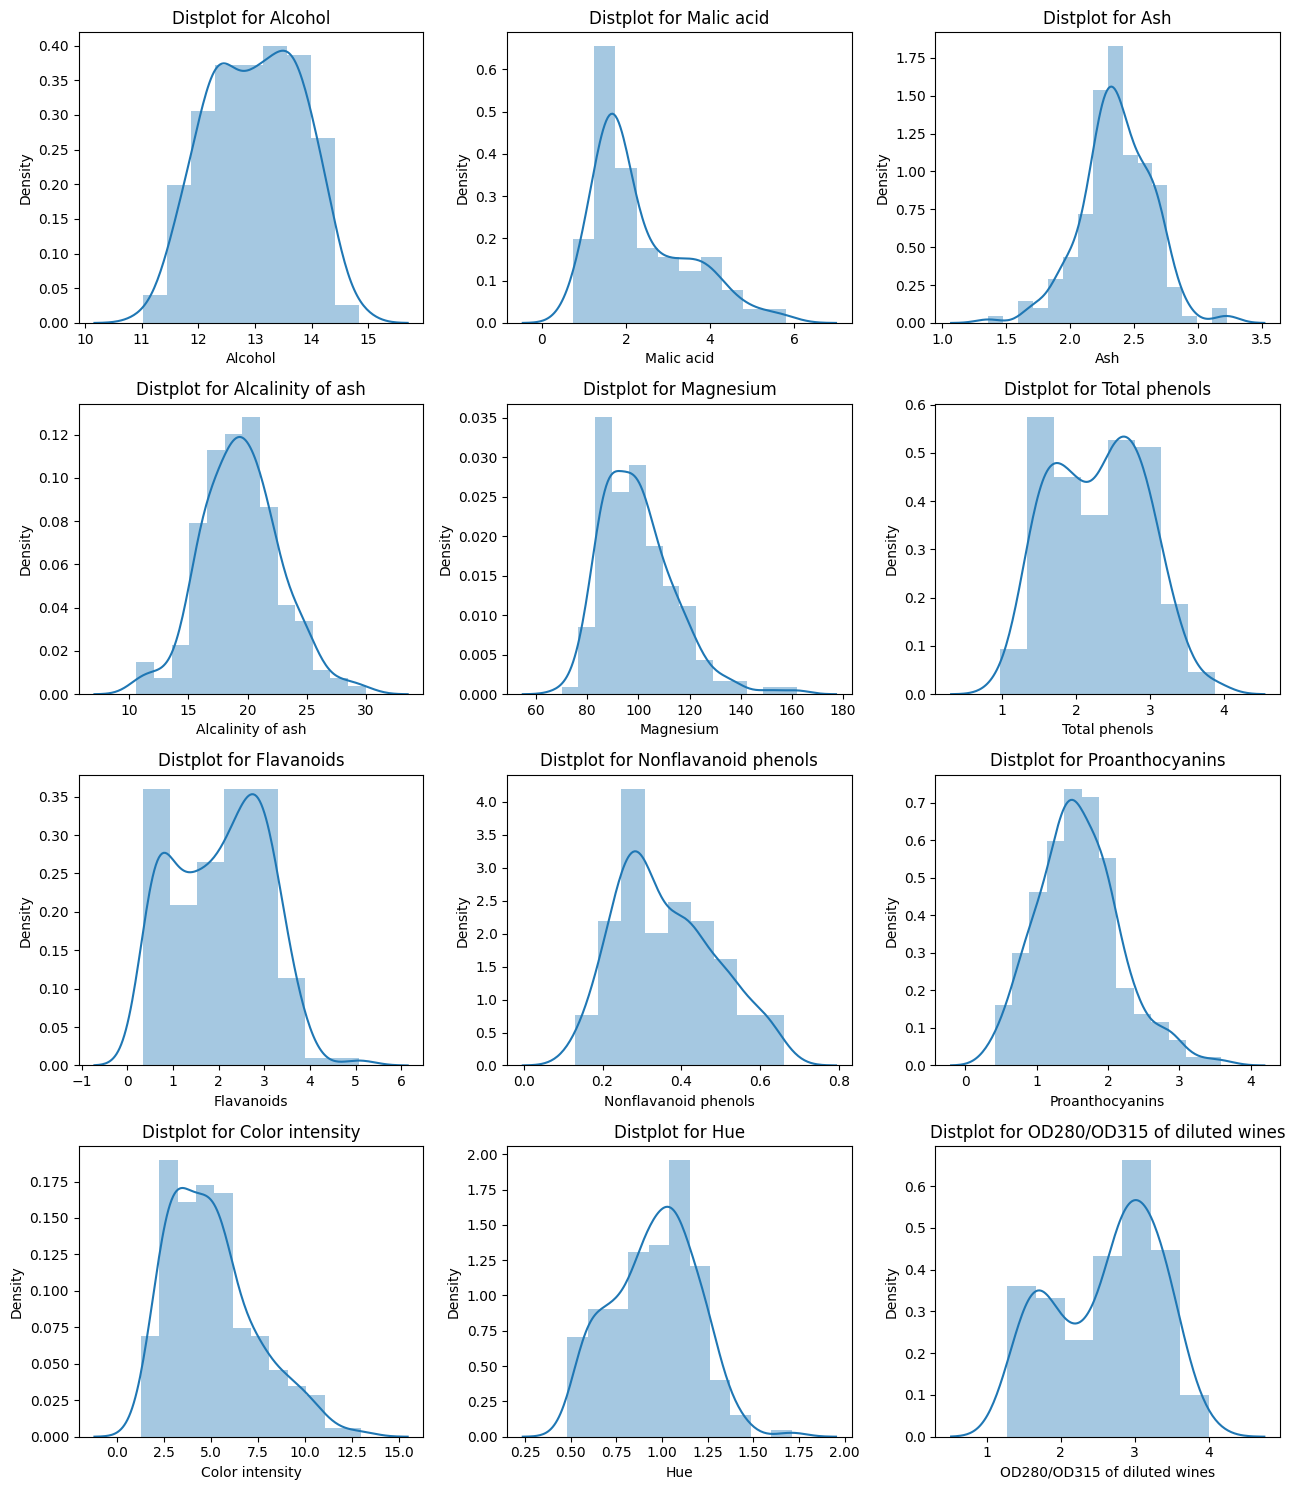

In [ ]:
# Set the number of rows and columns for the grid
num_rows = 4
num_cols = 3

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Get all columns except target column
feature_df = df.drop('Target', axis=1)

# Loop through the numeric columns and create distplots
for i, column in enumerate(feature_df):
    if i < num_rows * num_cols:
        sns.distplot(df[column], ax=axes[i])
        axes[i].set_title(f'Distplot for {column}')

# Remove any empty subplots
for i in range(len(feature_df), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
# analyzing skewness
skew_list= pd.DataFrame(df.skew())
skew_list.reset_index(inplace = True)
skew_list
skew_list.rename(columns={"index": "Column", 0: "Skew"},inplace=True)

result = []
for i in skew_list["Skew"]:
    if -0.5 < i < 0.5 :
        result.append("symmetrical")
    if -1 < i < -0.5  :
        result.append("positive slightly_skewed")
    if 0.5 < i < 1  :
        result.append("negative slightly_skewed")
    if -1 > i:
        result.append("negative skewed")
    if  1 < i:
        result.append("positive skewed")

skew_list["Result"] = result
skew_label = list(skew_list["Result"].unique())
skew_list_values = list(skew_list["Result"].value_counts())

skew_list

,Column,Skew,Result
0,Alcohol,-0.051482,symmetrical
1,Malic acid,1.039651,positive skewed
2,Ash,-0.176699,symmetrical
3,Alcalinity of ash,0.213047,symmetrical
4,Magnesium,1.098191,positive skewed
5,Total phenols,0.086639,symmetrical
6,Flavanoids,0.025344,symmetrical
7,Nonflavanoid phenols,0.450151,symmetrical
8,Proanthocyanins,0.517137,negative slightly_skewed
9,Color intensity,0.868585,negative slightly_skewed


In [ ]:
positive = skew_list[skew_list['Result'].str.contains("positive")]
positive = list(positive['Column'].values)

negative = skew_list[skew_list['Result'].str.contains("negative")]
negative = list(negative['Column'].values)

# handle positive skewness
for i in positive:
  transformed_data, _ = stats.boxcox(df[i])
  df[i] = transformed_data

# handle negative skewness
for i in negative:
  transformed_data, _ = stats.yeojohnson(df[i])
  df[i] = transformed_data

## Outlier

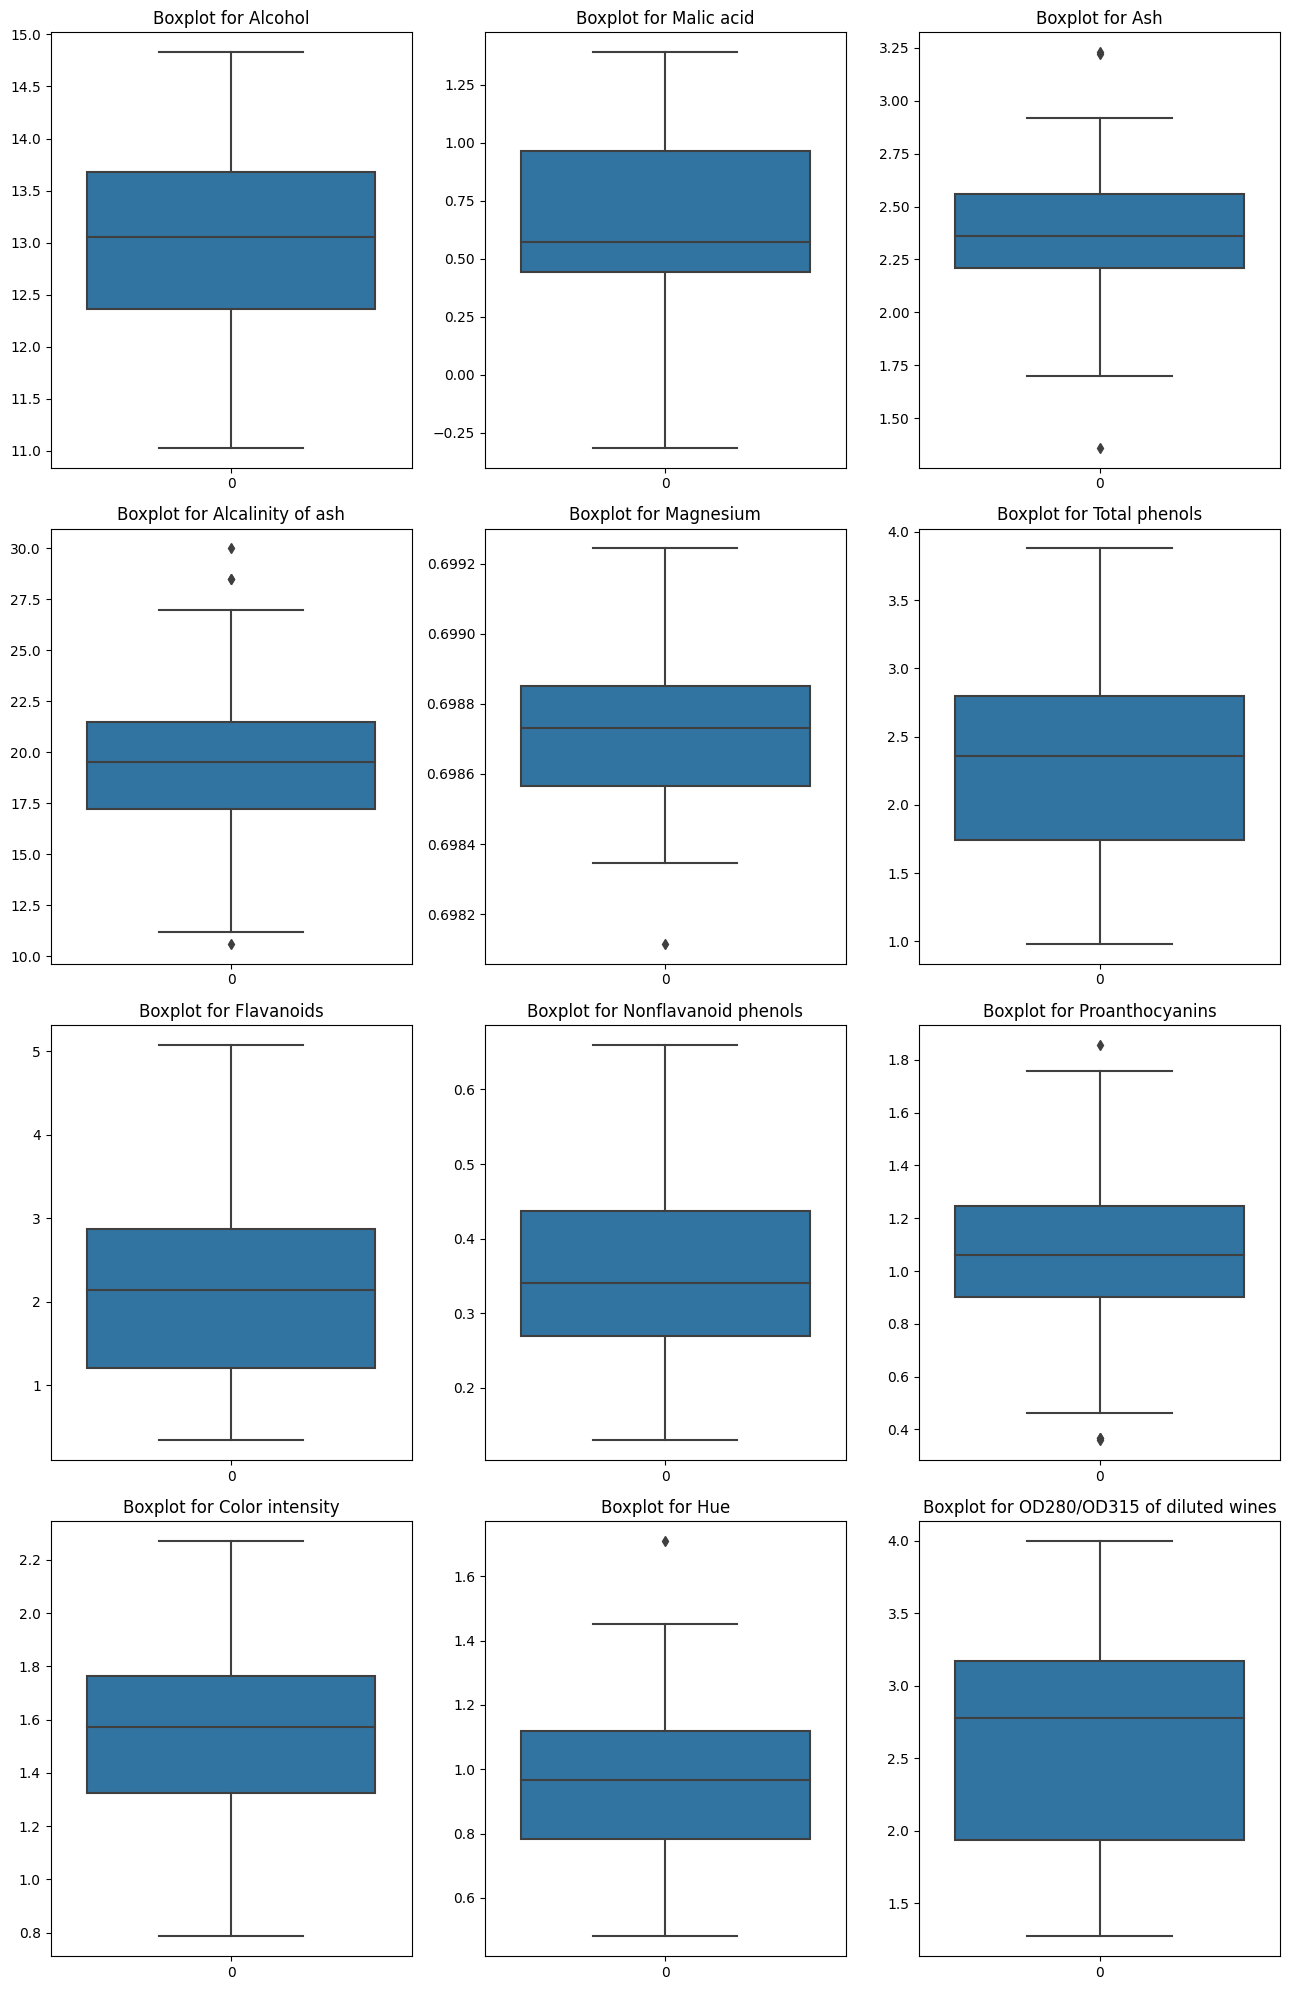

In [ ]:
# Set the number of rows and columns for the grid
num_rows = 4
num_cols = 3

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the numeric columns and create boxplots
for i, column in enumerate(df):
    if i < num_rows * num_cols:
        sns.boxplot(df[column], ax=axes[i])
        axes[i].set_title(f'Boxplot for {column}')

# Remove any empty subplots
for i in range(len(df), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
# # outliers handling using z-score
# cols_contain_outlier= ['Ash','Alcalinity of ash','Magnesium','Proanthocyanins','Hue']
# z_scores = stats.zscore(df[cols_contain_outlier])
# z_score_threshold = 2
# outlier_mask = (np.abs(z_scores) > z_score_threshold)
# df[cols_contain_outlier] = df[cols_contain_outlier][~outlier_mask]

In [ ]:
cols_contain_outlier = ['Ash','Alcalinity of ash','Magnesium','Proanthocyanins','Hue']

# Hitung Q1, Q3, dan IQR untuk setiap kolom
Q1 = df[cols_contain_outlier].quantile(0.25)
Q3 = df[cols_contain_outlier].quantile(0.75)
IQR = Q3 - Q1

# Filter outliers berdasarkan IQR pada kolom-kolom yang dipilih
df[cols_contain_outlier] = df[cols_contain_outlier][~((df[cols_contain_outlier] < (Q1 - 1.5 * IQR)) |
                                                      (df[cols_contain_outlier] > (Q3 + 1.5 * IQR)))]

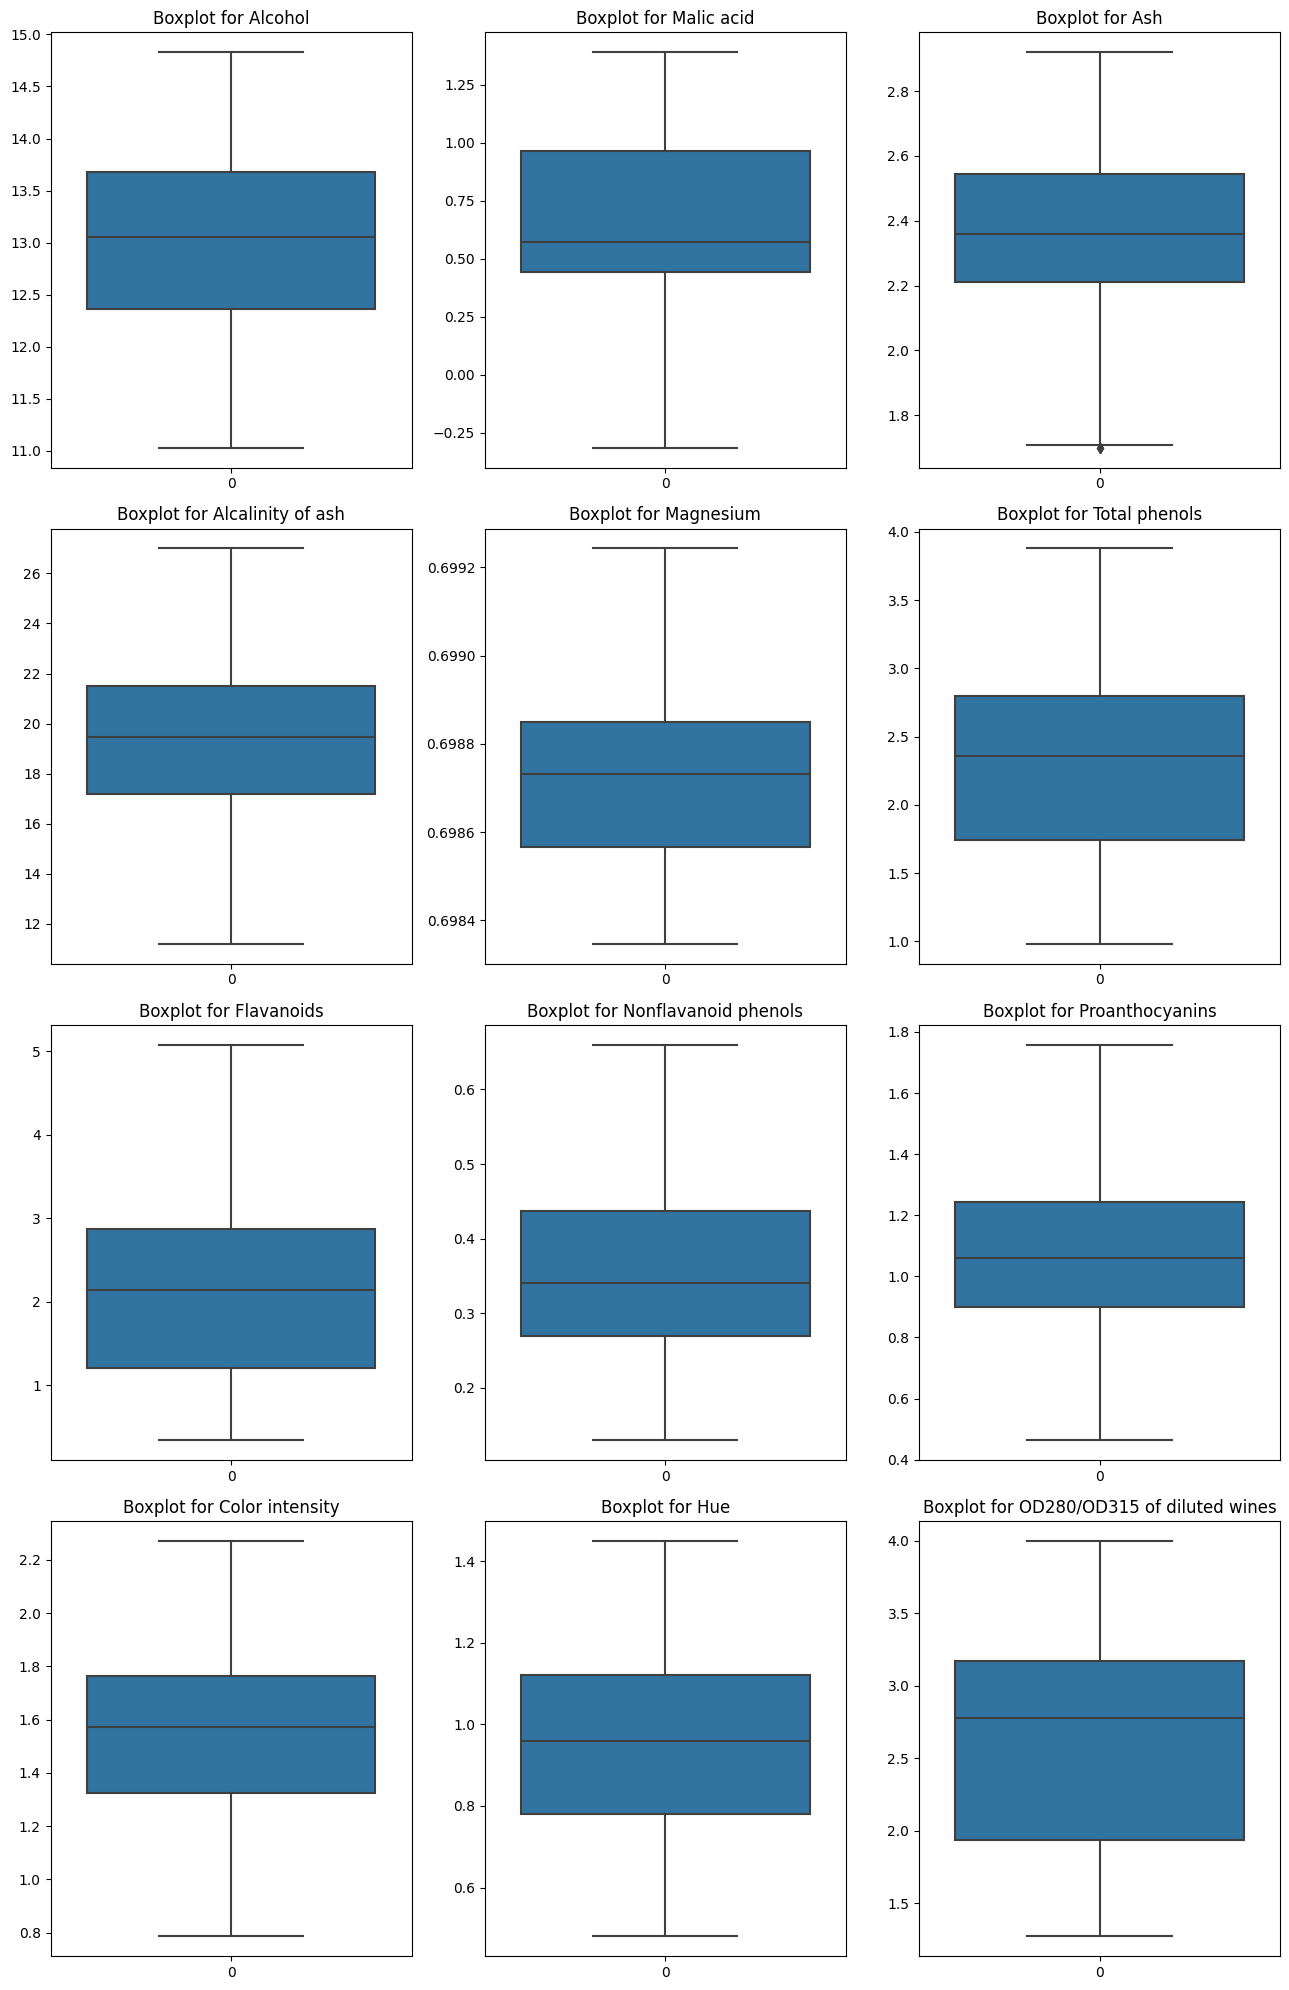

In [ ]:
# Set the number of rows and columns for the grid
num_rows = 4
num_cols = 3

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the numeric columns and create boxplots
for i, column in enumerate(df):
    if i < num_rows * num_cols:
        sns.boxplot(df[column], ax=axes[i])
        axes[i].set_title(f'Boxplot for {column}')

# Remove any empty subplots
for i in range(len(df), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
df.dropna(inplace=True)

## Correlation Heatmap

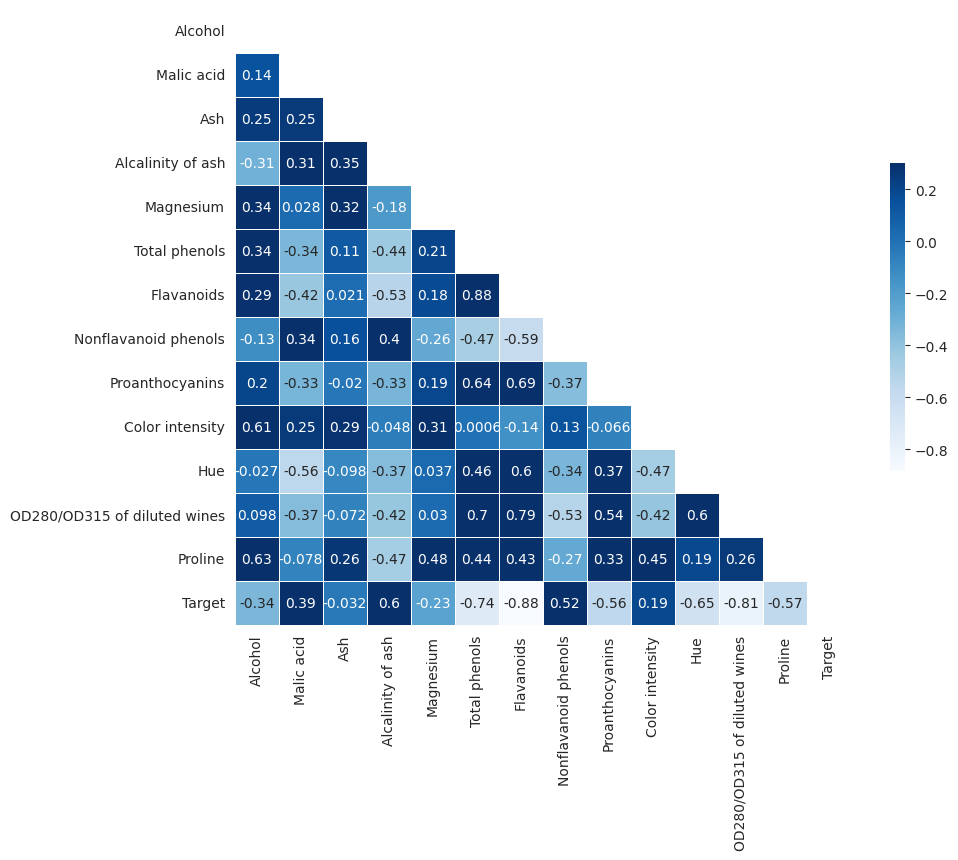

In [ ]:
# correlation
corr = df.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.color_palette('Blues', as_cmap=True)

with sns.axes_style('white'):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, cmap=cmap, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

Observation:

'Ash' variable has a minor influence on the target.

In [ ]:
df.drop(['Ash'], axis=1, inplace=True)

## Pairplot

In [ ]:
# sns.pairplot(df, hue='Target', palette='viridis', diag_kind='kde')
# plt.show()

Observation:

Particularly, variables such as "Total phenols," "Flavanoids," "Nonflavanoid phenols," and "Color intensity" seem to have a significant impact because their distributions do not overlap. On the other hand, the distributions of "Proanthocyanins," "Hue," and "OD280/OD315 of diluted wines" for target 1 (low quality) and target 2 (normal quality) overlap, making it challenging to identify clear clusters. Overall, target 3, representing excellent-grade wine quality, exhibits the most distinct distribution and is easily recognizable.

# **Feature Engineering**

In [ ]:
# Mapping dari kolom Target ke Label_target
target_mapping = {1: 'poor', 2: 'normal', 3: 'excellent'}
df['Label_target'] = df['Target'].map(target_mapping)

# Mapping dari Label_target ke angka (0, 1, 2)
label_mapping = {'poor': 0, 'normal': 1, 'excellent': 2}
df['Target'] = df['Label_target'].map(label_mapping)

In [ ]:
# Split dataset
X = df.drop(['Target','Label_target'], axis=1)
y = df[['Target']]

In [ ]:
standard_scaler = StandardScaler()
cols_to_normalize = X.columns
# Normalization (z-score scaling)
X[X.columns]= standard_scaler.fit_transform(X[X.columns])

# **Model v1**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Count the number of classes (labels)
num_classes = len(y['Target'].unique())

# Determine the value of k according to the provisions
if num_classes % 2 == 1:  # Odd number of classes
    k_values = [2, 4, 6]
else:  # Even number of classes
    k_values = [3, 5, 7]

print(f"k-values = {k_values}")

k-values = [2, 4, 6]


MahalanobisDistance is expecting a parameter V which is the covariance matrix, and optionally another parameter VI which is the inverse of the covariance matrix. Furthermore, both of these parameters are named and not positional.

In [ ]:
neighbors = np.arange(2, 8, 2)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Compute the covariance matrix of the training data
cov_matrix = LedoitWolf().fit(X_train)

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'V': cov_matrix.covariance_})
    knn.fit(X_train, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

    print(f'k={k}: Train Accuracy={train_accuracy[i]:.2f}, Test Accuracy={test_accuracy[i]:.2f}')

k=2: Train Accuracy=0.95, Test Accuracy=0.85
k=4: Train Accuracy=0.96, Test Accuracy=0.88
k=6: Train Accuracy=0.93, Test Accuracy=0.91


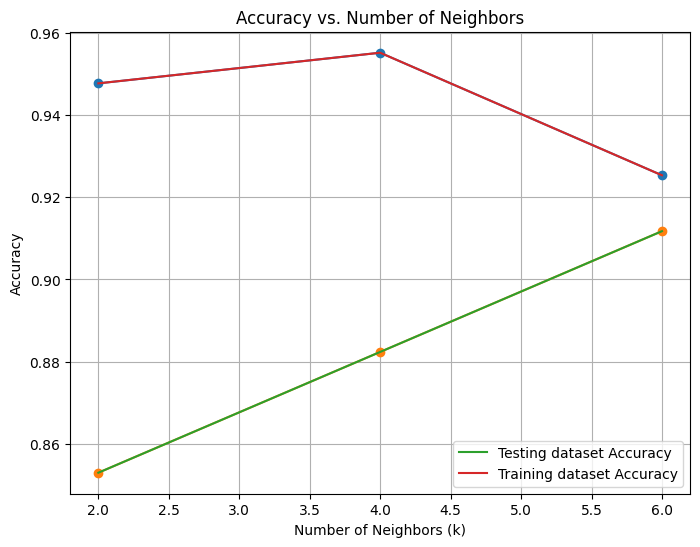

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, train_accuracy, marker='o', linestyle='-')
plt.plot(k_values, test_accuracy, marker='o', linestyle='-')
plt.plot(neighbors, test_accuracy, label='Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label='Training dataset Accuracy')

plt.legend()
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')

plt.grid(True)
plt.show()

Conclusion:

It appears that k=4 is the most optimal choice because it achieves the highest test accuracy (Test Accuracy=0.91) compared to the other k values. Even k=6 has the same test accuracy, it's typically a good practice to choose the simpler model.

In [ ]:
# Print confusion matrices
confusion_matrices = []

for i, k in enumerate(k_values):
    y_pred = knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    print(f'Confusion Matrix for k={k}:')
    print(confusion_matrices[i])

Confusion Matrix for k=2:
[[15  0  0]
 [ 2  9  1]
 [ 0  0  7]]
Confusion Matrix for k=4:
[[15  0  0]
 [ 2  9  1]
 [ 0  0  7]]
Confusion Matrix for k=6:
[[15  0  0]
 [ 2  9  1]
 [ 0  0  7]]


Future developments:

- Implement stratified k-fold cross-validation to ensure a balanced distribution of target classes in each fold.
- Utilize GridSearchCV to fine-tune hyperparameters, such as comparing different weighting schemes (e.g., distance or uniform) and various distance metrics (e.g., Euclidean, Mahalanobis) and the value of n_neighbours to optimize the K-nearest neighbors model.

# **Model v2**

In [ ]:
# Define the number of folds
n_splits = 5  # Adjust the number of folds as needed

# Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store results
X_train_folds = []
X_test_folds = []
y_train_folds = []
y_test_folds = []

# Split the data into training and testing folds using StratifiedKFold
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    X_train_folds.append(X_train_fold)
    X_test_folds.append(X_test_fold)
    y_train_folds.append(y_train_fold)
    y_test_folds.append(y_test_fold)

for fold in range(n_splits):
    X_train = X_train_folds[fold]
    X_test = X_test_folds[fold]
    y_train = y_train_folds[fold]
    y_test = y_test_folds[fold]

In [ ]:
def create_model(learning_rate=1.0e-3, units_1=64, units_2=32):
    model = keras.Sequential([
        keras.layers.Dense(units_1, activation='relu', input_shape=(12,)),
        keras.layers.Dense(units_2, activation='relu'),
        keras.layers.Dense(3, activation='softmax')
    ])
    optimizer = optimizers.RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
param_grid = {
    'learning_rate': [1.0e-3, 1.0e-4, 1.0e-5],
    'units_1': [32, 64, 128],
    'units_2': [4, 8, 16]
}

In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

ValueError: ignored

In [ ]:
best_params = grid_result.best_params_
best_model = grid_result.best_estimator_

In [ ]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    # Check accuracy
    if(logs.get('accuracy') > 0.99):
      # Stop if threshold is met
      print("\nAccuracy is greater than 0.99 so cancel training!")
      self.model.stop_training = True

In [ ]:
# Instantiate class
callbacks = myCallback()
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[callbacks])

Epoch 1/100
2/2 [==============================] - 0s 147ms/step - loss: 1.1400 - accuracy: 0.3630 - val_loss: 1.0898 - val_accuracy: 0.4242
Epoch 2/100
2/2 [==============================] - 0s 23ms/step - loss: 1.0407 - accuracy: 0.4444 - val_loss: 1.0079 - val_accuracy: 0.4848
Epoch 3/100
2/2 [==============================] - 0s 30ms/step - loss: 0.9652 - accuracy: 0.5111 - val_loss: 0.9593 - val_accuracy: 0.6061
Epoch 4/100
2/2 [==============================] - 0s 23ms/step - loss: 0.9127 - accuracy: 0.5778 - val_loss: 0.9126 - val_accuracy: 0.6364
Epoch 5/100
2/2 [==============================] - 0s 25ms/step - loss: 0.8641 - accuracy: 0.6519 - val_loss: 0.8780 - val_accuracy: 0.6667
Epoch 6/100
2/2 [==============================] - 0s 22ms/step - loss: 0.8237 - accuracy: 0.7185 - val_loss: 0.8417 - val_accuracy: 0.6667
Epoch 7/100
2/2 [==============================] - 0s 23ms/step - loss: 0.7880 - accuracy: 0.7333 - val_loss: 0.8009 - val_accuracy: 0.6970
Epoch 8/100
2/2 [==

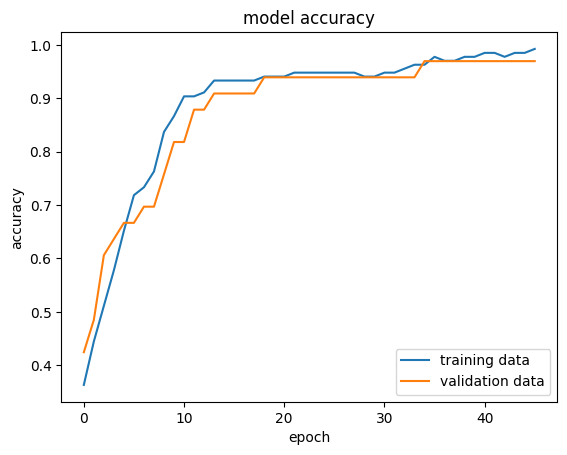

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

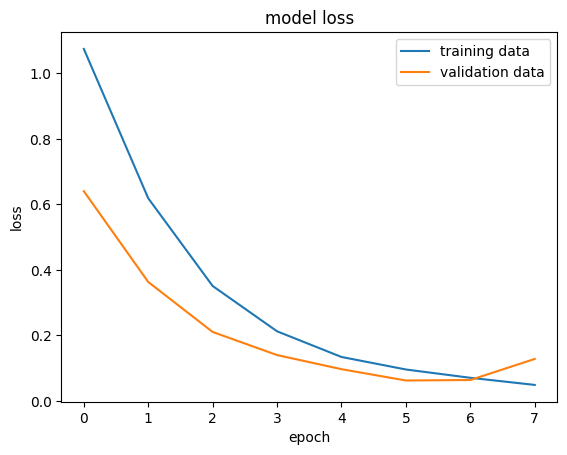

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')